In [157]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt
from skimage import io
from skimage import metrics

In [158]:
#define psnr, mse, ssim and compressRatio
def psnr(img, compressed):
    return metrics.peak_signal_noise_ratio(image,compressed)
def mse(img, compressed):
    return metrics.mean_squared_error(image,compressed)
def ssim(img, compressed):
    return metrics.structural_similarity(image,compressed,multichannel=True)
def compressRatio(img, compressed):
    return img/compressed

# read RGB values

In [159]:
image = imread(os.path.join('10.jpg'))
blue,green,red =image[:,:,0],image[:,:,1],image[:,:,2]

# Apply DWT

In [160]:
n = 4
w = 'db1'
keep = 0.2

coeffs = pywt.wavedec2(blue,wavelet=w,level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))


thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
ind = np.abs(coeff_arr) > thresh
Cfilt = coeff_arr * ind # Threshold small indices
    
coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
    
# Plot reconstruction
Arecon1 = pywt.waverec2(coeffs_filt,wavelet=w)

In [161]:
n = 4
w = 'db1'
keep = 0.2

coeffs = pywt.wavedec2(green,wavelet=w,level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))


thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
ind = np.abs(coeff_arr) > thresh
Cfilt = coeff_arr * ind # Threshold small indices
    
coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
    
# Plot reconstruction
Arecon2 = pywt.waverec2(coeffs_filt,wavelet=w)

In [162]:
n = 4
w = 'db1'
keep = 0.2

coeffs = pywt.wavedec2(red,wavelet=w,level=n)

coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)

Csort = np.sort(np.abs(coeff_arr.reshape(-1)))


thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
ind = np.abs(coeff_arr) > thresh
Cfilt = coeff_arr * ind # Threshold small indices
    
coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
    
# Plot reconstruction
Arecon3 = pywt.waverec2(coeffs_filt,wavelet=w)

In [163]:
img_compressed = (np.dstack((Arecon1, Arecon2, Arecon3))).astype(np.uint8)


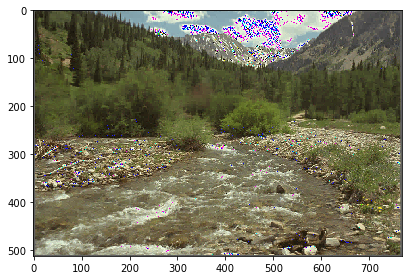

In [164]:
io.imshow(img_compressed)
io.show()


In [165]:
#Save the image into memory
io.imsave('dwt_sec_0_2.jpg', img_compressed)

In [166]:
image = io.imread('kodim13.png')
newImage = io.imread('dwt_sec_0_2.jpg')
print ("mse, psnr, ssim and cr value")
print("mse is :",mse(image, newImage))
print("psnr is :",psnr(image, newImage))

print("ssim is :",ssim(image,newImage))
print("compression ratio is :",compressRatio(os.path.getsize('kodim13.png'),os.path.getsize('dwt_sec_0_2.jpg')))



mse, psnr, ssim and cr value
mse is : 679.9665857950846
psnr is : 19.80592789281326
ssim is : 0.6619536082902991
compression ratio is : 8.144615049548078


In [168]:
print(os.path.getsize('10.jpg'))

764605


In [125]:
print(os.path.getsize('kmeans_kodim13.png'),'bytes')

750241 bytes
